In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [5]:
DATADIR = 'F:/jeevanthask/research/datasets/malwareimages/data'
CATEGORIES = ["benign","malicious"]

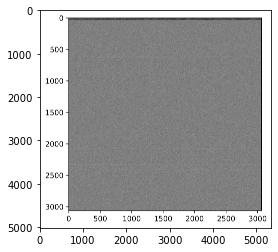

In [6]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [7]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [8]:
print(img_array.shape)

(5018, 5338)


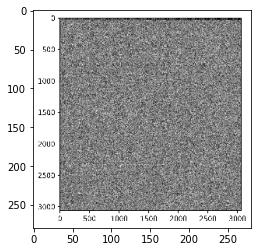

In [9]:
IMG_SIZE = 280

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [10]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [11]:
print(len(training_data))

1029


In [12]:
import random
random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
1
0
0
1
1


In [14]:
X = []
y = []

In [15]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [16]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [17]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [19]:
X[1]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)